In [2]:
#%% Imports
import csv
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

In [3]:

#%% Read data
data = []
with open('calibration-50ms-8cycles.csv') as csvfile:
	reader = csv.reader(csvfile)
	for row in reader:
		for col in row:
			
			data.append(int(col))


print(data)

[67, 144, 227, 314, 395, 473, 554, 641, 722, 799, 879, 966, 1046, 1124, 1202, 1289, 1369, 1447, 1526, 1611, 1691, 1769, 1847, 1933, 2012, 2088, 2167, 2252, 2331, 2409, 2488, 2571, 2649, 2729, 2807, 2891, 2971, 3049, 3127, 3212, 3290, 3371, 3449, 3534, 3614, 3692, 3772, 3858, 3938, 4017, 4097, 4185, 4265, 4343, 4425, 4511, 4592, 4670, 4753, 4840, 4921, 5001, 5083, 5171, 5252, 5332, 5413, 5503, 5585, 5664, 5746, 5837, 5918, 5997, 6080, 6170, 6252, 6331, 6415, 6504, 6586, 6667, 6749, 6841, 6923, 7003, 7085, 7177, 7259, 7340, 7423, 7513, 7597, 7677, 7759, 7851, 7935, 8015, 8098, 8188, 8272, 8352, 8434, 8523, 8607, 8688, 8769, 8858, 8942, 9022, 9103, 9192, 9274, 9354, 9435, 9522, 9605, 9685, 9765, 9853, 9934, 10013, 10092, 10179, 10260, 10339, 10419, 10507, 10586, 10665, 10745, 10831, 10911, 10990, 11070, 11155, 11236, 11315, 11393, 11479, 11559, 11639, 11719, 11803, 11883, 11963, 12042, 12126, 12207, 12286, 12368, 12453, 12532, 12609, 12691, 12777, 12857, 12935, 13016, 13102, 13181, 13259,

In [4]:
# %% Sort data
data.sort()
print(data)

[67, 144, 227, 314, 395, 473, 554, 641, 722, 799, 879, 966, 1046, 1124, 1202, 1289, 1369, 1447, 1526, 1611, 1691, 1769, 1847, 1933, 2012, 2088, 2167, 2252, 2331, 2409, 2488, 2571, 2649, 2729, 2807, 2891, 2971, 3049, 3127, 3212, 3290, 3371, 3449, 3534, 3614, 3692, 3772, 3858, 3938, 4017, 4097, 4185, 4265, 4343, 4425, 4511, 4592, 4670, 4753, 4840, 4921, 5001, 5083, 5171, 5252, 5332, 5413, 5503, 5585, 5664, 5746, 5837, 5918, 5997, 6080, 6170, 6252, 6331, 6415, 6504, 6586, 6667, 6749, 6841, 6923, 7003, 7085, 7177, 7259, 7340, 7423, 7513, 7597, 7677, 7759, 7851, 7935, 8015, 8098, 8188, 8272, 8352, 8434, 8523, 8607, 8688, 8769, 8858, 8942, 9022, 9103, 9192, 9274, 9354, 9435, 9522, 9605, 9685, 9765, 9853, 9934, 10013, 10092, 10179, 10260, 10339, 10419, 10507, 10586, 10665, 10745, 10831, 10911, 10990, 11070, 11155, 11236, 11315, 11393, 11479, 11559, 11639, 11719, 11803, 11883, 11963, 12042, 12126, 12207, 12286, 12368, 12453, 12532, 12609, 12691, 12777, 12857, 12935, 13016, 13102, 13181, 13259,

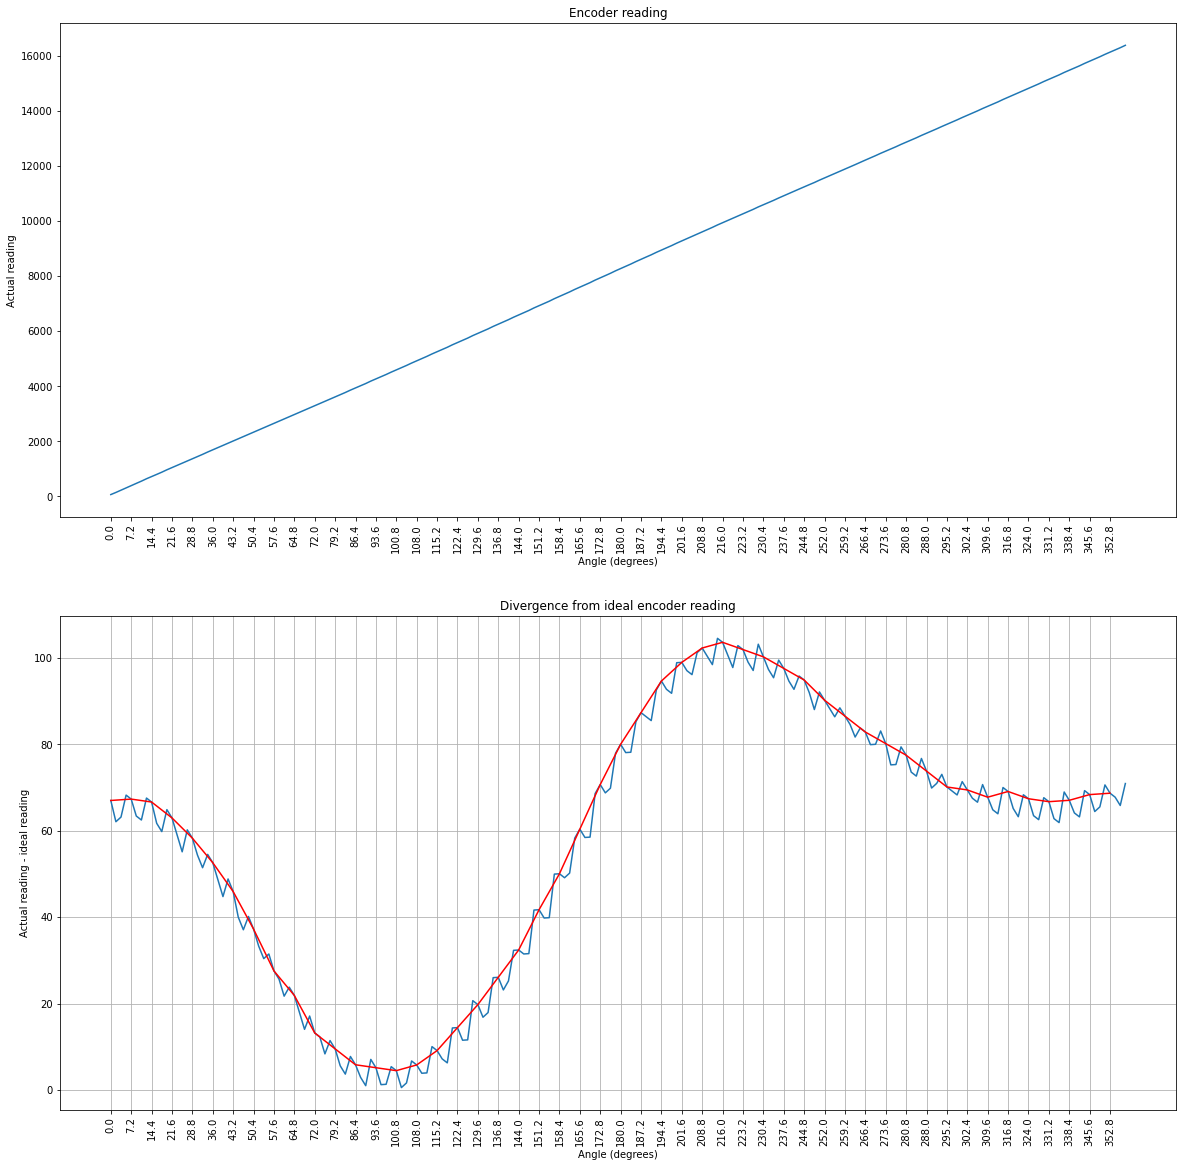

In [15]:
# %% Draw all data

data = np.array(data)
angles = np.arange(0, 360, 1.8)
ideal_encoder_values = angles / 360 * (1 << 14)
delta = data - ideal_encoder_values

fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(2, 1, 1)
plt.plot(angles, data)
plt.xticks(rotation=90)
plt.title("Encoder reading")
plt.ylabel("Actual reading")
plt.xlabel("Angle (degrees)")
ax.set_xticks(np.arange(0, 360, 1.8*4))


ax = fig.add_subplot(2, 1, 2)
plt.plot(angles, delta)
plt.xticks(rotation=90)
plt.title("Divergence from ideal encoder reading")
plt.ylabel("Actual reading - ideal reading")
plt.xlabel("Angle (degrees)")
ax.set_xticks(np.arange(0, 360, 1.8*4))


# Plot 1 in 4
N = len(angles)
plt.plot(angles[0:N:4], delta[0:N:4], 'r')

plt.grid(True)


In [23]:
ideal_encoder_values[199]

16302.08

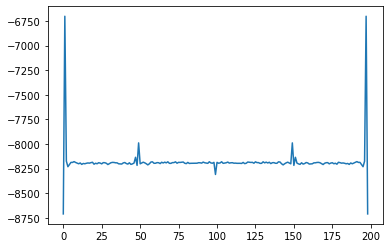

In [33]:
plt.plot(np.fft.fft(data)[1:])

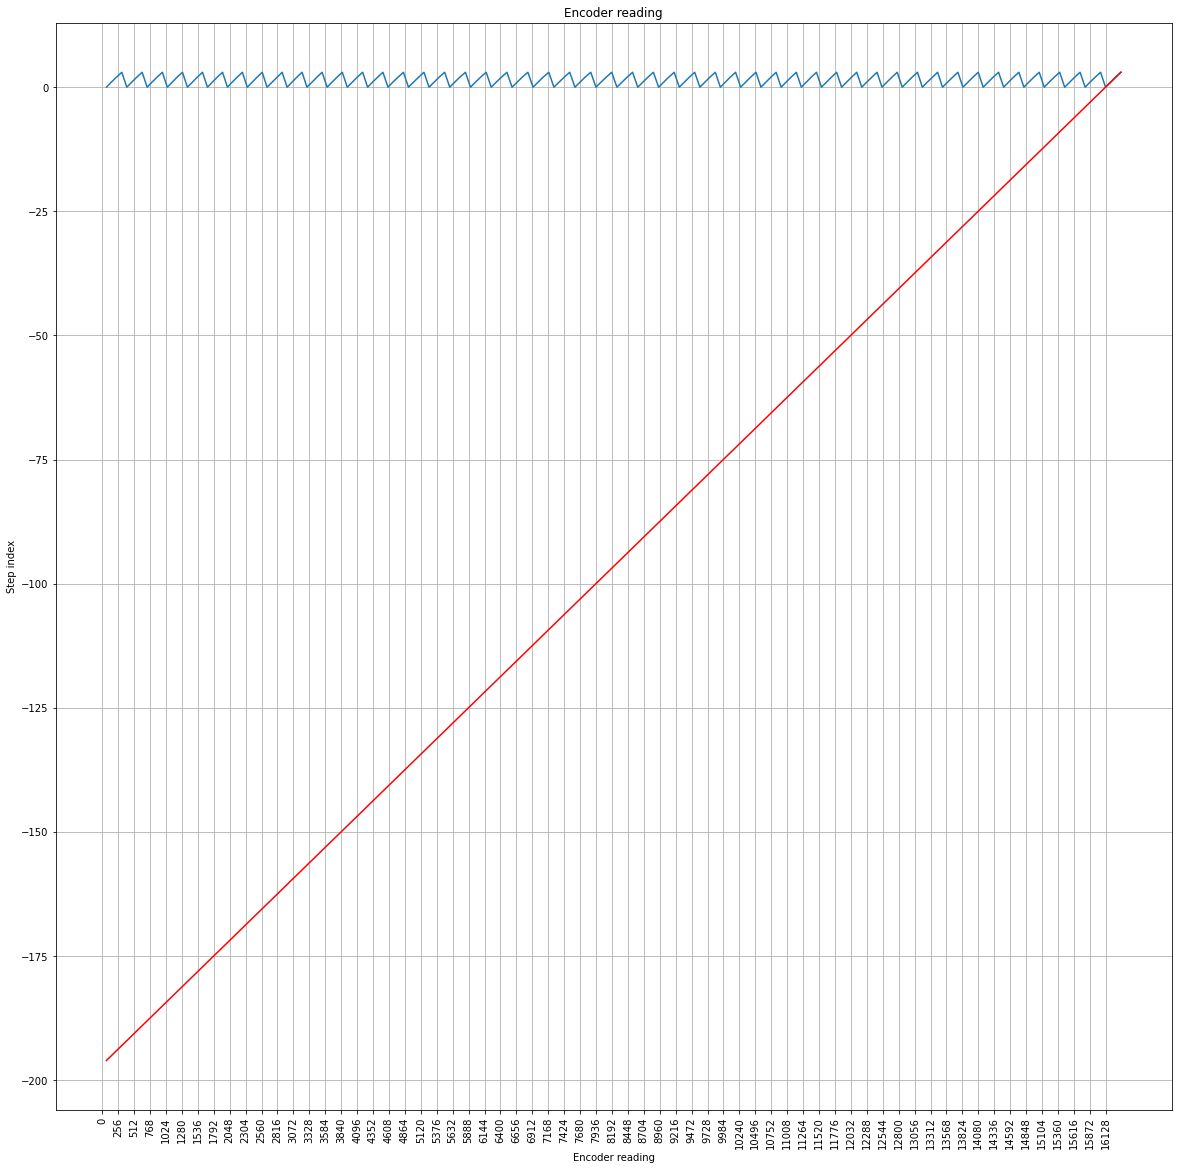

In [62]:
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(1, 1, 1)
plt.plot(data, np.arange(0, N) % 4)
plt.xticks(rotation=90)
plt.title("Encoder reading")
plt.ylabel("Step index")
plt.xlabel("Encoder reading")
ax.set_xticks(np.arange(0, 1 << 14, 1 << 8))

# The encoder value where each step starts
step_start_data = data[0:N:4]
steps_per_encoder = (360/1.8) / (1 << 14)

def lookup_step(encoder_value):
    for i in range(len(step_start_data)):
        if i >= len(step_start_data) - 1:
            return i, step_start_data[i]
        if encoder_value >= step_start_data[i] and encoder_value < step_start_data[i + 1]:
            return i, step_start_data[i]

def encoder_to_step_index(encoder_value):
    if encoder_value < step_start_data[0]:
        # This is before the first recorded step. Offset by 360 degrees
        encoder_value += 1 << 14

    step_cycle_index, step_cycle_encoder_start_value = lookup_step(encoder_value)
    return (encoder_value - step_cycle_encoder_start_value) * steps_per_encoder

plt.plot(data, [encoder_to_step_index(x) for x in data], 'r')

plt.grid(True)

In [56]:
1 << 14

16384

In [43]:
len(step_start_data)

50